C:\Users\91948\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91948\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The accuracy score of K-Mean:  0.24
The Confusion matrixof K-Mean:
 [[ 0 50  0]
 [48  0  2]
 [14  0 36]]
The accuracy score of EM:  0.3333333333333333
The Confusion matrix of EM:
  [[ 0 50  0]
 [45  0  5]
 [ 0  0 50]]


C:\Users\91948\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


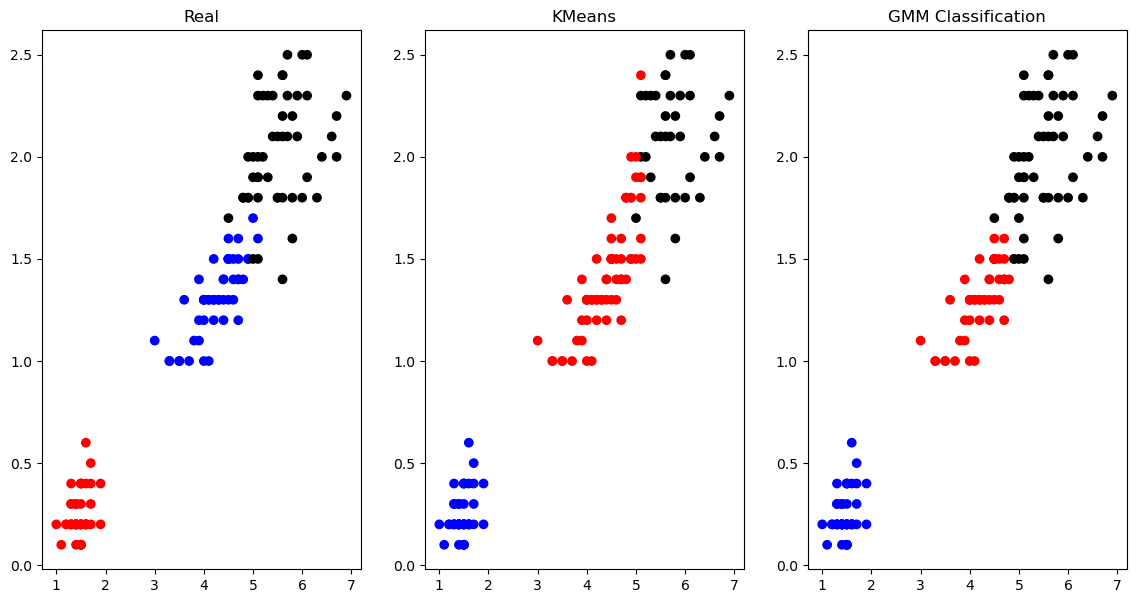

In [1]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

names = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class']

dataset = pd.read_csv("7-dataset.csv", names=names)

X = dataset.iloc[:, :-1]  

label = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2} 

y = [label[c] for c in dataset.iloc[:, -1]]

plt.figure(figsize = (14, 7))
colormap = np.array(['red', 'blue', 'black'])

plt.subplot(1, 3, 1)
plt.title('Real')
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[y])

model = KMeans(n_clusters = 3, random_state = 0).fit(X)
plt.subplot(1, 3, 2)
plt.title('KMeans')
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[model.labels_])

print('The accuracy score of K-Mean: ', metrics.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean:\n', metrics.confusion_matrix(y, model.labels_))

gmm = GaussianMixture(n_components = 3, random_state = 0).fit(X)
y_cluster_gmm = gmm.predict(X)
plt.subplot(1, 3, 3)
plt.title('GMM Classification')
plt.scatter(X.Petal_Length, X.Petal_Width ,c = colormap[y_cluster_gmm])

print('The accuracy score of EM: ', metrics.accuracy_score(y, y_cluster_gmm))
print('The Confusion matrix of EM:\n ', metrics.confusion_matrix(y, y_cluster_gmm))